# TIMESERIES FORECASTING USING ARIMA

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [59]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

In [4]:
data = yf.download("TATAMOTORS.NS", start="2010-01-01", end="2018-12-31",interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [65]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-01,156.629990,167.147186,132.874786,137.396286,128.662720,308512479
2010-02-01,136.080399,146.429398,125.404907,140.730530,131.785019,296708433
2010-03-01,140.730530,164.179016,140.730530,149.931824,140.401428,544769911
2010-04-01,150.386948,173.835434,138.514297,172.667969,161.692352,512797698
2010-05-01,172.351364,174.666519,132.577972,149.397568,139.901154,564931097
...,...,...,...,...,...,...
2018-08-01,250.000000,274.700012,243.100006,267.500000,267.500000,308332043
2018-09-01,271.399994,282.000000,219.500000,223.699997,223.699997,255084345
2018-10-01,225.000000,232.800003,164.600006,179.100006,179.100006,434206704


In [6]:
data[['Close']]

,Close
Date,
2010-01-01,137.396286
2010-02-01,140.730530
2010-03-01,149.931824
2010-04-01,172.667969
2010-05-01,149.397568
...,...
2018-08-01,267.500000
2018-09-01,223.699997
2018-10-01,179.100006


In [68]:
TATA=data[['Close']].astype('int')

In [69]:
TATA

,Close
Date,
2010-01-01,137
2010-02-01,140
2010-03-01,149
2010-04-01,172
2010-05-01,149
...,...
2018-08-01,267
2018-09-01,223
2018-10-01,179


## Stationary Check

<Axes: xlabel='Date'>

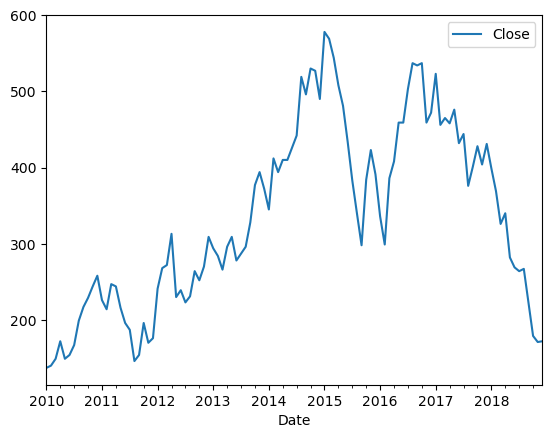

In [70]:
TATA.plot()

In [71]:
TATA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2010-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   108 non-null    int32
dtypes: int32(1)
memory usage: 1.3 KB


# Decomposing Trend / Seasonal Component

In [72]:
decompose=sm.tsa.seasonal_decompose(TATA,model='addictive',period=5)

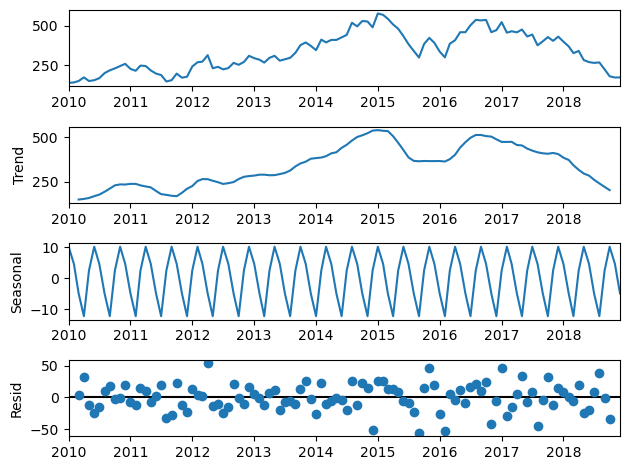

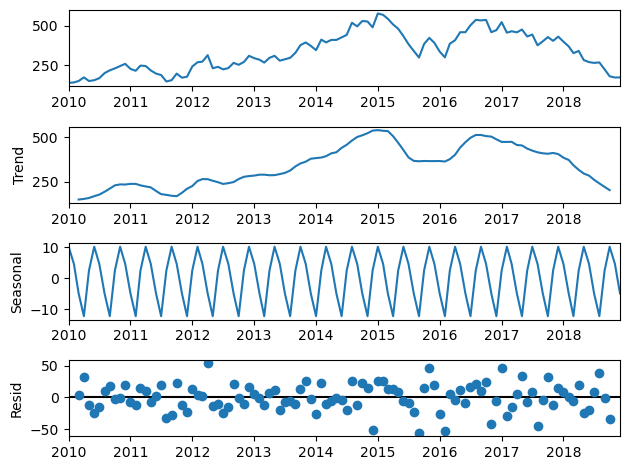

In [73]:
decompose.plot()

# Agumented Dickey Fullet Test

In [15]:
from statsmodels.tsa.stattools import adfuller

In [74]:
adf=adfuller(TATA)

In [75]:
print('adfuller value;',adf[1])

adfuller value; 0.44541315195349795


# First Difference

In [78]:
TATA2=TATA.diff().dropna()

<Axes: xlabel='Date'>

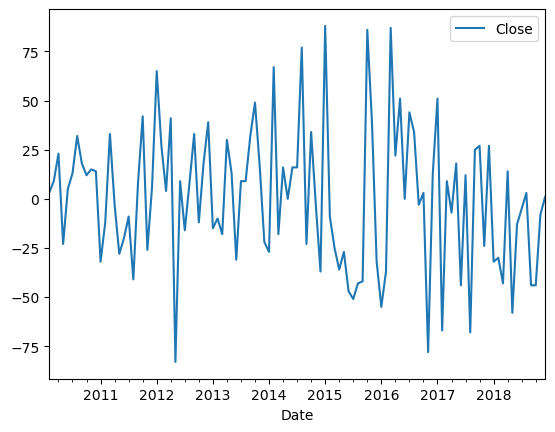

In [79]:
TATA2.plot()


# Decomposing Trend / Seasonal Component

In [80]:
decompose1=sm.tsa.seasonal_decompose(TATA2,model='additive',period=5)

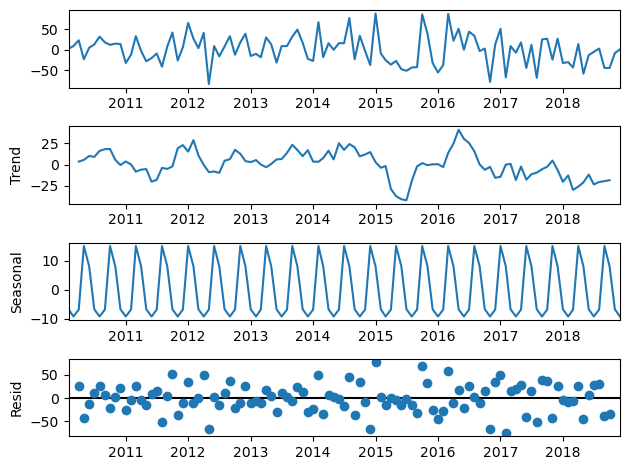

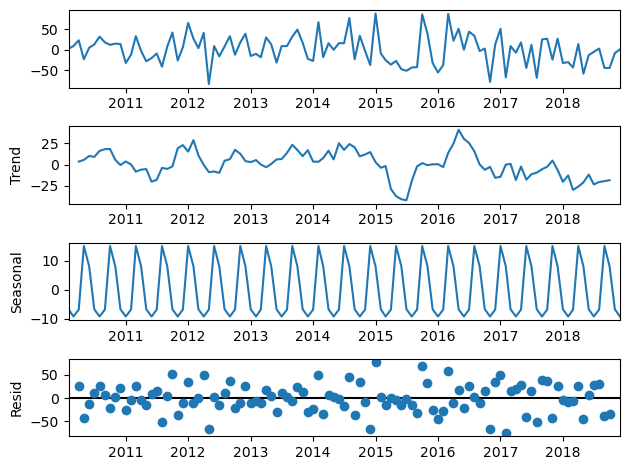

In [81]:
decompose1.plot()

In [102]:
adf1=adfuller(TATA2)

In [103]:
print('adfuller value;',adf1[1])

adfuller value; 4.664674235099945e-18


In [82]:
TATA2

,Close
Date,
2010-02-01,3.0
2010-03-01,9.0
2010-04-01,23.0
2010-05-01,-23.0
2010-06-01,5.0
...,...
2018-08-01,3.0
2018-09-01,-44.0
2018-10-01,-44.0


# Split Train \ Test 

In [83]:
len(TATA2)

107

In [84]:
train=TATA2[:80]
test=TATA2[80:]

# ARIMA model Building

# Choosing Hyperparameters (p,d,q)

In [85]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

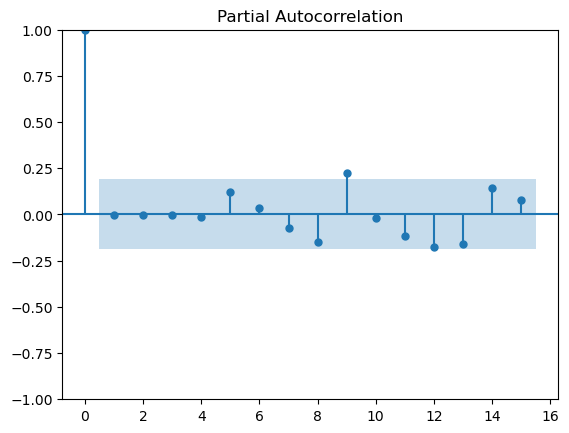

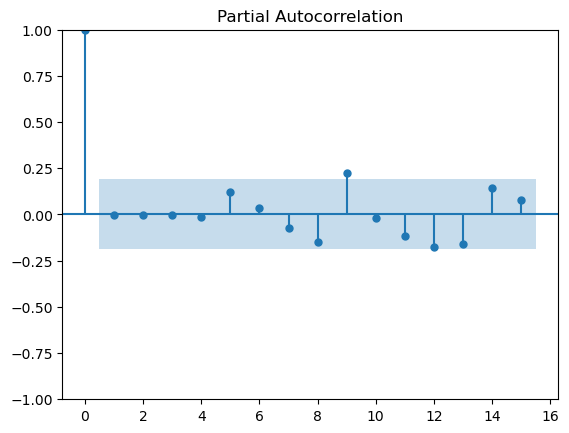

In [86]:
plot_pacf(TATA2['Close'].dropna(),lags=15)

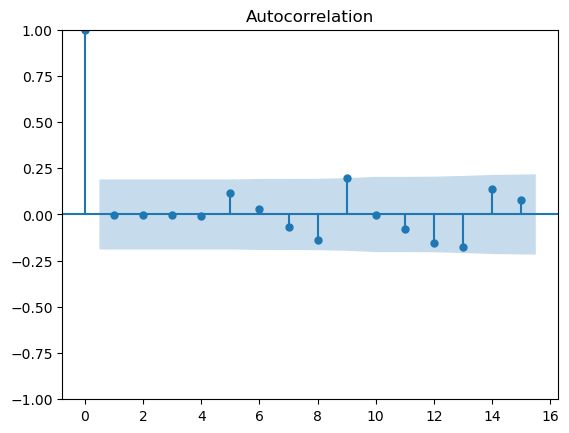

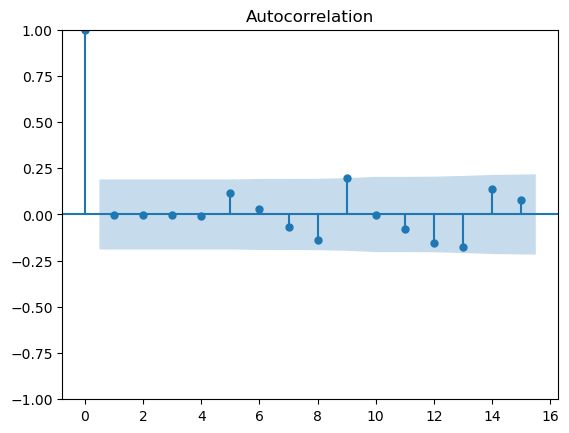

In [87]:
plot_acf(TATA2['Close'].dropna(),lags=15)

# Fit the model

In [88]:
model=sm.tsa.arima.ARIMA(train,order=(12,1,9)).fit()

# Predict the Test data

In [89]:
predict=model.predict(start=len(train),end=(len(TATA2)-1))

In [90]:
predict

2016-10-01   -38.748058
2016-11-01   -26.042348
2016-12-01    44.734326
2017-01-01    13.080884
2017-02-01     6.351989
2017-03-01   -25.672240
2017-04-01    26.513296
2017-05-01    24.563792
2017-06-01   -12.895517
2017-07-01   -13.473211
2017-08-01   -16.489148
2017-09-01    37.392237
2017-10-01    10.358939
2017-11-01     2.379999
2017-12-01    -1.053802
2018-01-01     8.596248
2018-02-01    23.144225
2018-03-01   -14.221578
2018-04-01    -7.530667
2018-05-01    -4.337171
2018-06-01    19.008314
2018-07-01    15.826835
2018-08-01    -2.046676
2018-09-01     7.509029
2018-10-01     6.268617
2018-11-01    13.150382
2018-12-01    -6.080088
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

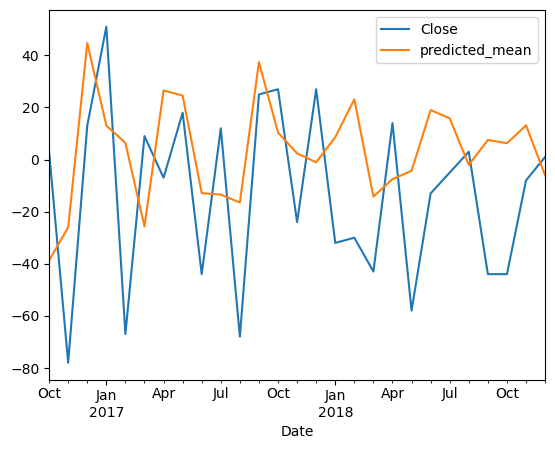

In [91]:
test['Close'].plot(legend=True)
predict.plot(legend=True)

# Model Evaluation 

In [92]:
error1=np.sqrt(mean_squared_error(test,predict))

In [93]:
error1

36.830266489955996

# RMSE Normalization

In [94]:
TATA.max()

Close    578
dtype: int32

In [95]:
TATA.min()

Close    137
dtype: int32

In [96]:
TATA.max()-TATA.min()

Close    441
dtype: int32

In [97]:
rmse=36/441

In [98]:
rmse

0.08163265306122448

In [101]:
round(0.08163265306122448, 1)

0.1